# 02 - Data Exploration
This notebook performs the data exploration and analysis phase of the pipeline. It loads the interim dataset from `data/interim/` folder and perform all the essential steps of the EDA process.

## Import libraries and set the paths

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from yellowbrick.target import FeatureCorrelation
from yellowbrick.features import Rank1D

from src.config import INTERIM_DATA_DIR, FIGURES_DIR
from src.utils.io_utils import load_csv

2025-06-15 17:10:11.088 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: /home/leonardosaccotelli/Desktop/UNIVERSITA/MACHINE-LEARNING/Dynamic-Ensemble-Learning-for-Credit-Card-Fraud-Detection


In [2]:
interim_path: Path = INTERIM_DATA_DIR / "creditcardfraud_cleaned.csv"
print(f"interim_path: {interim_path}")

interim_path: /home/leonardosaccotelli/Desktop/UNIVERSITA/MACHINE-LEARNING/Dynamic-Ensemble-Learning-for-Credit-Card-Fraud-Detection/data/interim/creditcardfraud_cleaned.csv


In [3]:
FIGURES_DATA_EXPLORATION_DIR = FIGURES_DIR / "data_exploration"
FIGURES_DATA_EXPLORATION_DIR.mkdir(parents=True, exist_ok=True)

In [4]:
pd.set_option('display.max_columns', None)
plt.rcParams.update({'font.size': 16})
sns.set_style("whitegrid")
sns.set_palette("tab10")

## Data Loading and Basic Overview
We begin by loading the interim credit card fraud dataset. This is the cleaned file after running data-cleaning phase. It contains cleaned anonymized PCA components (`V1`–`V28`), `Time`, `Amount`, and the `Class` label.

In [5]:
df = load_csv(interim_path, delimiter=",")
print(f"rows, cols = {df.shape}")

rows, cols = (283726, 31)


In [6]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
283725,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## Target Variable Distribution
Visualize the class imbalance — essential for fraud detection tasks where Class 1 (fraud) is rare.

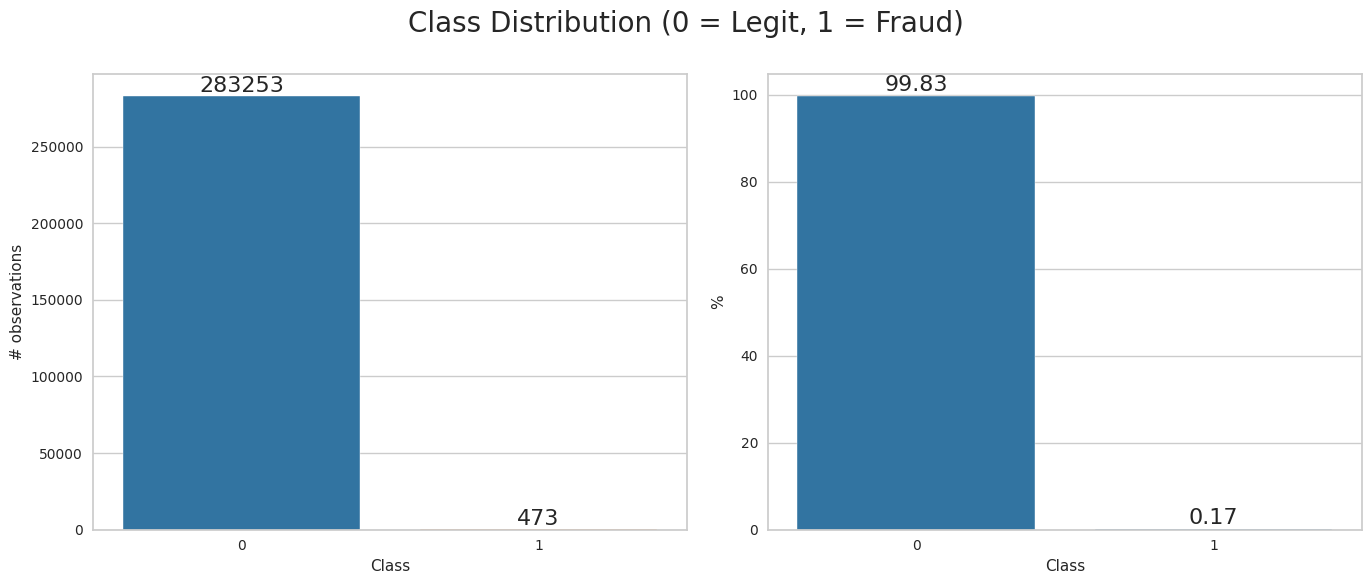

In [10]:
class_counts = df['Class'].value_counts().sort_index()
total = class_counts.sum()
class_percentages = class_counts / total * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Counting the observations per class
sns.countplot(ax=axes[0], data=df, x='Class', hue='Class', legend=False)
axes[0].set_xlabel("Class")
axes[0].set_ylabel("# observations")
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Subplot 2: Percentage per class
sns.barplot(ax=axes[1], x=class_percentages.index.astype(str), y=class_percentages.values)
axes[1].set_xlabel("Class")
axes[1].set_ylabel("%")
for i, v in enumerate(class_percentages.values):
    axes[1].text(i, v + 1.1, f"{v:.2f}", ha='center')

plt.suptitle("Class Distribution (0 = Legit, 1 = Fraud)", fontsize=20)
plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "class_distribution_absolute_vs_percentage.png", dpi=300)
plt.show()

##  Temporal Behavior Based on Relative Time

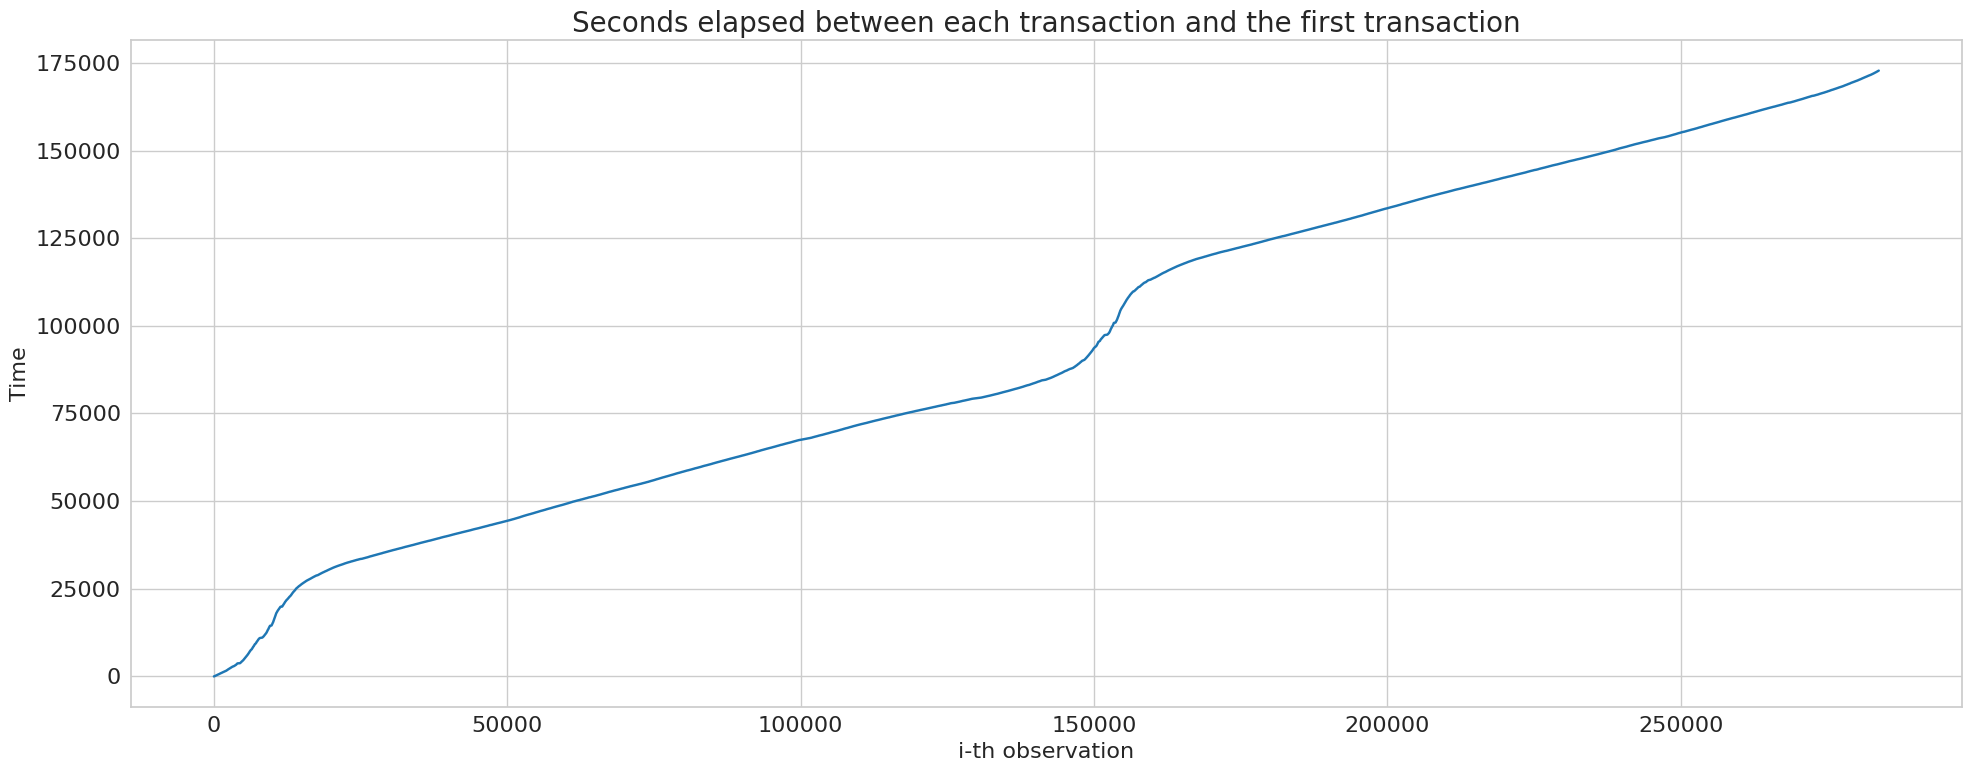

In [11]:
plt.figure(figsize=(20, 8))
df['Time'].plot()
plt.xlabel('i-th observation', fontsize=16)
plt.ylabel('Time', fontsize=16)
plt.tick_params(labelsize=16)
plt.title('Seconds elapsed between each transaction and the first transaction', fontsize=20)
plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "seconds_elapsed_per_transactions.png", dpi=300)
plt.show()

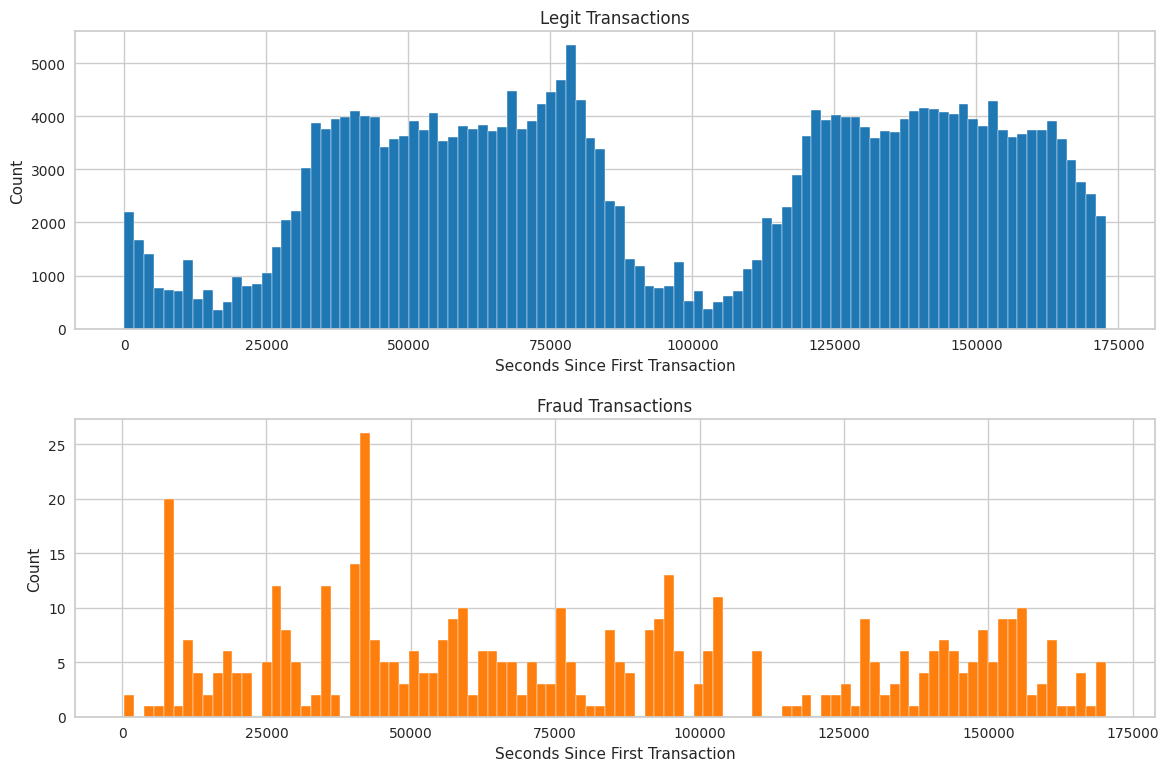

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Legit count distribution by hour
sns.histplot(df[df.Class == 0]['Time'],
             bins=100,
             stat="count",
             kde=False,
             color=sns.color_palette()[0],
             alpha=1.0,
             ax=axes[0],
             )
axes[0].set_title("Legit Transactions")
axes[0].set_xlabel("Seconds Since First Transaction")

# Fraud counts distribution by hour
sns.histplot(df[df.Class == 1]['Time'],
             bins=100,
             stat="count",
             kde=False,
             color=sns.color_palette()[1],
             alpha=1.0,
             ax=axes[1],
            )
axes[1].set_title("Fraud Transactions")
axes[1].set_xlabel("Seconds Since First Transaction")

plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "hourly_distribution.png", dpi=300)
plt.show()

For Legit transactions, we can observe a repetitive wave pattern with two large peaks. This suggests transaction volume follows a diurnal (daily) cycle: possibly office hours and nighttime dips, repeated over two days. This gives us confidence that time reflects real-world temporal behavior.

For Fraud transactions, we have much lower volume, but the key insight is that fraud attempts are not uniformly distributed. We can see clusters/spikes in specific time windows. This suggests frauds may be targeted in bursts, likely by bots or coordinated attacks.

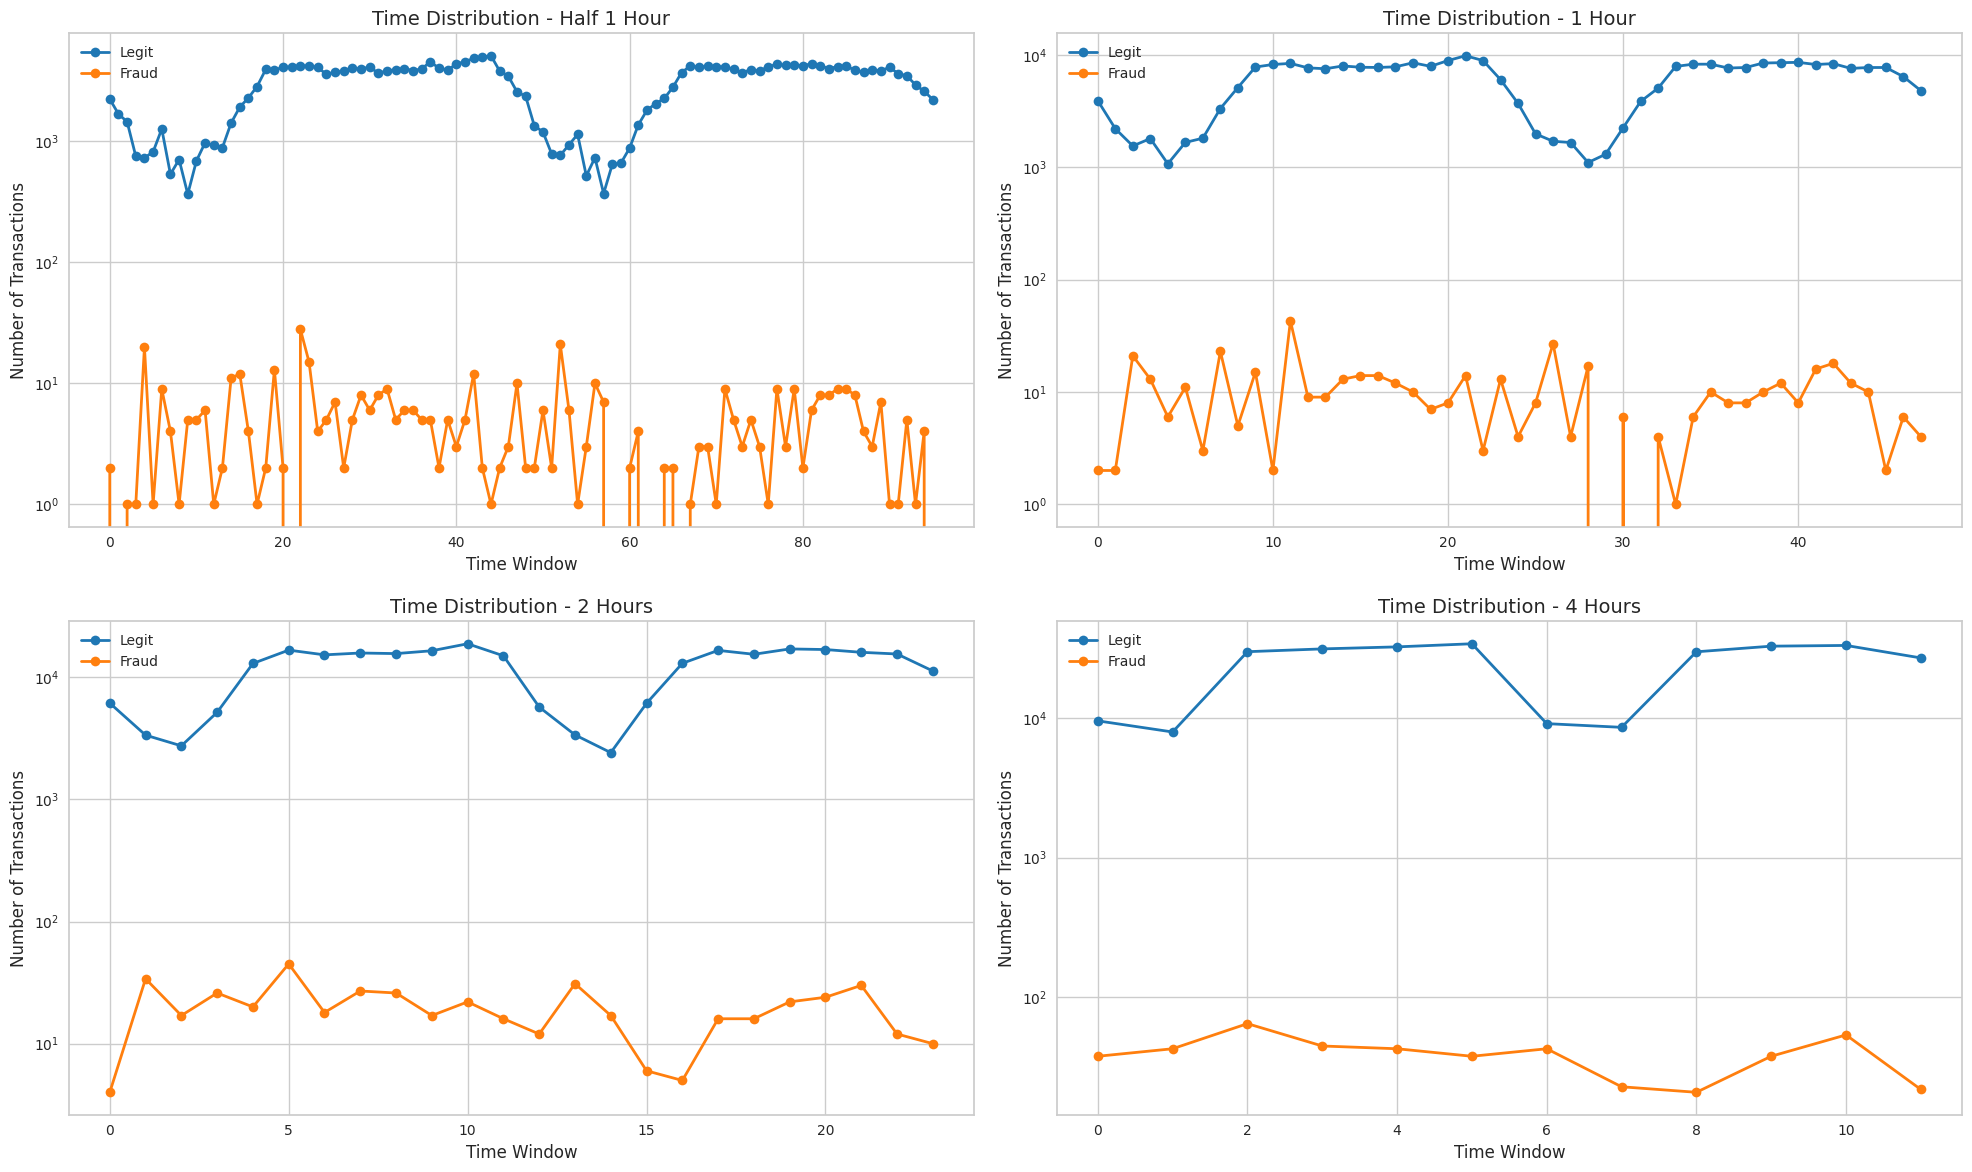

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes = axes.flatten()

# Time windows in seconds
time_windows = {
    "half_1_hour": 1800,
    "1_hour": 3600,
    "2_hours": 7200,
    "4_hours": 14400,
}

# Loop through each window
for i, (label, window) in enumerate(time_windows.items()):
    df[f"time_bin_{label}"] = (df["Time"] // window).astype(int)
    grouped = df.groupby([f"time_bin_{label}", "Class"]).size().reset_index(name="count")
    grouped = grouped.pivot(index=f"time_bin_{label}", columns="Class", values="count").fillna(0)
    grouped.columns = ["Legit", "Fraud"]

    ax = axes[i]
    grouped.plot(ax=ax, kind="line", marker='o', linewidth=2)
    ax.set_title(f"Time Distribution - {label.replace('_', ' ').title()}", fontsize=14)
    ax.set_xlabel("Time Window", fontsize=12)
    ax.set_ylabel("Number of Transactions", fontsize=12)
    ax.set_yscale('log')

plt.tight_layout()
plt.show()

## Transaction Amount Distribution

In [14]:
# Understand the range, mean, standard deviation, and presence of outliers.
df['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

The distribution is highly skewed right:
- The **mean (88.47)** is much higher than the **median (22.00)**.
- The **standard deviation (250.4)** is extremely large compared to the median. This indicates a **long right tail** — many small transactions and few extremely large ones.

Presence of outliers: the maximum (25691.16) is hundreds of times larger than the median.

Most transactions are small:
- 75% of transactions are ≤ 77.51.
- So, 75% of transactions are under 80, and half are ≤ 22.

There are zero-amount transactions. This may:
- Represent failed/incomplete attempts.
- Be edge cases or errors.
- Indicate fraud tests (e.g., verifying a card).

In [15]:
df.groupby("Class")["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


Fraud Transactions Tend to Have Lower Central Tendency:
- Median for fraud: 9.82
- Median for legit: 22.00

It suggests that many fraudulent transactions are small test payments — a typical pattern in fraud: attackers test cards with small charges.

Higher 75th Percentile for Fraud
- 75% of frauds are below 105.89, while 75% of legits are below 77.46.
- The upper tail of frauds is heavier — indicating some high-value frauds, even though many are small.

More Variation in Fraud
- Both classes have similar std dev (~250–260), but:
- Fraud has a much lower max: 2125.87 vs. 25691.16
- Legit class includes massive outliers
- Suggests fraud detection should not rely on raw Amount magnitude alone — log transform helps here.

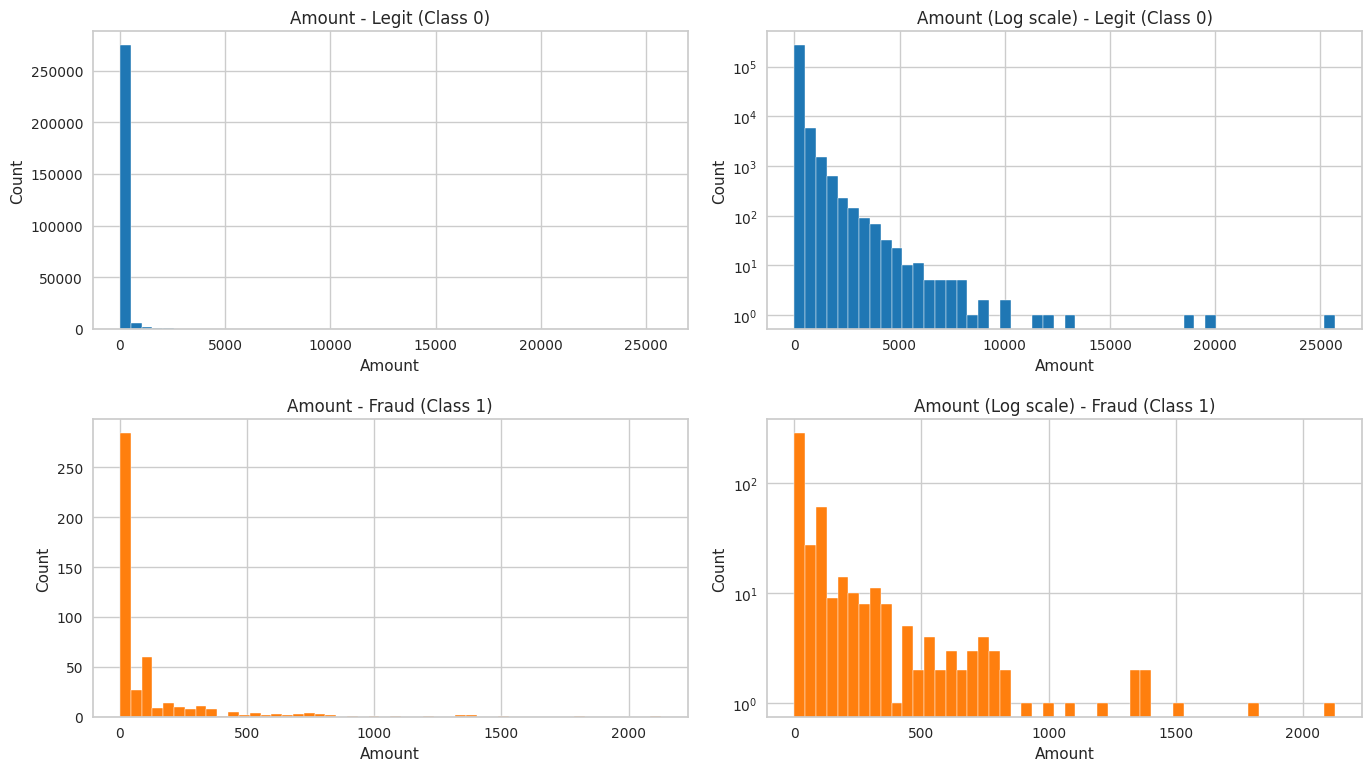

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

sns.histplot(df[df.Class == 0]['Amount'],
             bins=50,
             stat="count",
             kde=False,
             color=sns.color_palette()[0],
             alpha=1.0,
             fill=True,
             ax=axes[0,0])
axes[0,0].set_title("Amount - Legit (Class 0)")

sns.histplot(df[df.Class == 0]['Amount'],
             bins=50,
             stat="count",
             kde=False,
             color=sns.color_palette()[0],
             alpha=1.0,
             ax=axes[0,1])
axes[0,1].set_title("Amount (Log scale) - Legit (Class 0)")
axes[0,1].set_yscale('log')

sns.histplot(df[df.Class == 1]['Amount'],
             bins=50,
             stat="count",
             kde=False,
             color=sns.color_palette()[1],
             alpha=1.0,
             ax=axes[1,0])
axes[1,0].set_title("Amount - Fraud (Class 1)")

sns.histplot(df[df.Class == 1]['Amount'],
             bins=50,
             stat="count",
             kde=False,
             color=sns.color_palette()[1],
             alpha=1.0,
             ax=axes[1,1])
axes[1,1].set_title("Amount (Log scale) - Fraud (Class 1)")
axes[1,1].set_yscale('log')

plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "amount_log_amount_distribution.png", dpi=300)
plt.show()

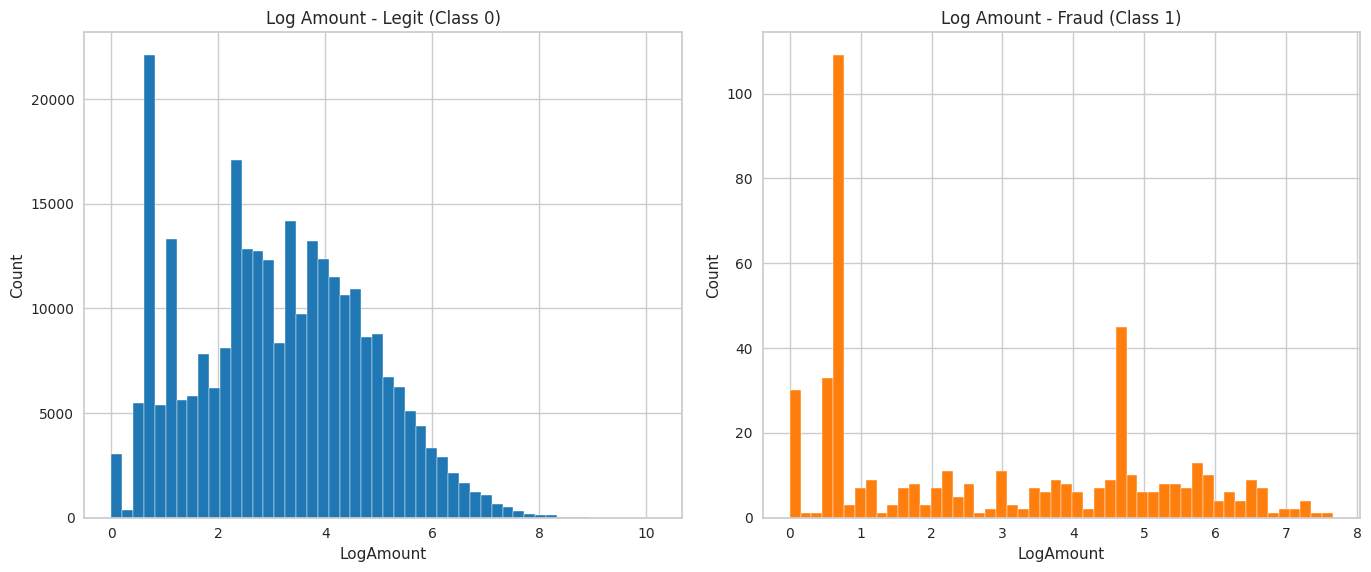

In [17]:
df['LogAmount'] = np.log1p(df['Amount'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df[df.Class == 0]['LogAmount'],
             bins=50,
             stat="count",
             kde=False,
             color=sns.color_palette()[0],
             alpha=1.0,
             ax=axes[0])
axes[0].set_title("Log Amount - Legit (Class 0)")

sns.histplot(df[df.Class == 1]['LogAmount'],
             bins=50,
             stat="count",
             kde=False,
             color=sns.color_palette()[1],
             alpha=1.0,
             ax=axes[1])
axes[1].set_title("Log Amount - Fraud (Class 1)")

plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "log_amount_distribution.png", dpi=300)
plt.show()

Raw Amount is extremely skewed in both classes:
- LEGIT amount is strong right skew, majority < 100 with a very long tail (up to 25000).
- FRAUD amount is extreme skew, points concentrated near 0–200, on few large values. Thus, most are tiny, reinforcing the pattern of “low-risk test charges.”

Log transformation improves interpretability:
- Brings both distributions into a more symmetric and usable form.
- Allows better learning by models sensitive to feature scale (e.g., logistic regression, neural networks).

Raw Amount is not suitable for modeling In its raw form, Amount would cause (Use LogAmount instead of Amount):
- Scale issues
- Inefficient convergence
- Oversensitivity to outliers

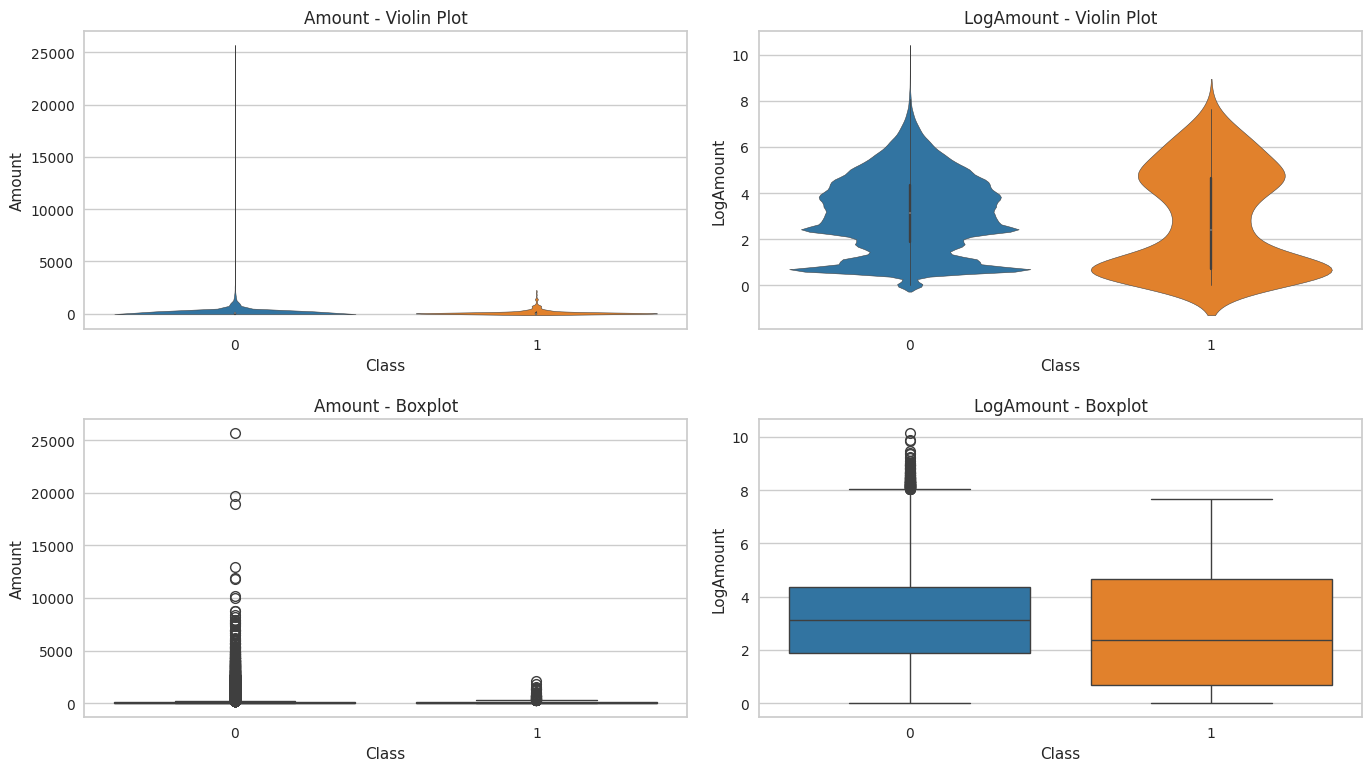

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

sns.violinplot(data=df,
               x="Class",
               y="Amount",
               hue="Class",
               ax=axes[0,0],
               legend=False)
axes[0,0].set_title("Amount - Violin Plot")

sns.violinplot(data=df,
               x="Class",
               y="LogAmount",
               hue="Class",
               ax=axes[0,1],
               legend=False)
axes[0,1].set_title("LogAmount - Violin Plot")

sns.boxplot(data=df,
            x="Class",
            y="Amount",
            hue="Class",
            ax=axes[1,0],
            legend=False)
axes[1,0].set_title("Amount - Boxplot")

sns.boxplot(data=df,
            x="Class",
            y="LogAmount",
            hue="Class",
            ax=axes[1,1],
            legend=False)
axes[1,1].set_title("LogAmount - Boxplot")

plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "amount_log_amount_box_violin.png", dpi=300)
plt.show()

We can confirm that class 0 has extreme outliers up to 25000, while mostly data are tightly packed below 500. For class 1, we have a much tighter range, nearly all under 2000.

Boxplot shows massive skew and outlier influence in class 0. In general, amount is dominated by extreme values, especially in class 0.

 Log transform stabilizes variance, compresses outliers, and makes fraud/legit distributions visually and statistically manageable.

In [19]:
for cls in [0, 1]:
    print(f"\nClass {cls} quantiles:")
    print(df[df.Class == cls]['Amount'].quantile([0.01, 0.25, 0.5, 0.75, 0.99, 0.999]))


Class 0 quantiles:
0.010       0.12000
0.250       5.67000
0.500      22.00000
0.750      77.46000
0.990    1018.05760
0.999    3012.92544
Name: Amount, dtype: float64

Class 1 quantiles:
0.010       0.00000
0.250       1.00000
0.500       9.82000
0.750     105.89000
0.990    1364.13680
0.999    1976.62832
Name: Amount, dtype: float64


Lower Quantiles: Fraud is Smaller
Fraud transactions at 1%, 25%, and 50% levels are significantly smaller than legitimate ones:
- Median fraud = 9.82, vs 22.00 for legit.
- 25% of frauds are ≤ $1.00 → suggests test charges or micro-transactions.

This aligns with prior findings: many frauds are low-value attempts

Upper Quantiles: Fraud is More Concentrated
At the 75th percentile:
- Fraud = 105.89
- Legit = 77.46

At the 99th percentile:

- Fraud = 1364
- Legit = 1018

But at the 99.9th percentile:
- Fraud tops out lower (1976) compared to legit (3012)

Fraud range is narrower, especially in upper outliers — legitimate users sometimes spend thousands; fraudsters rarely exceed 2000.

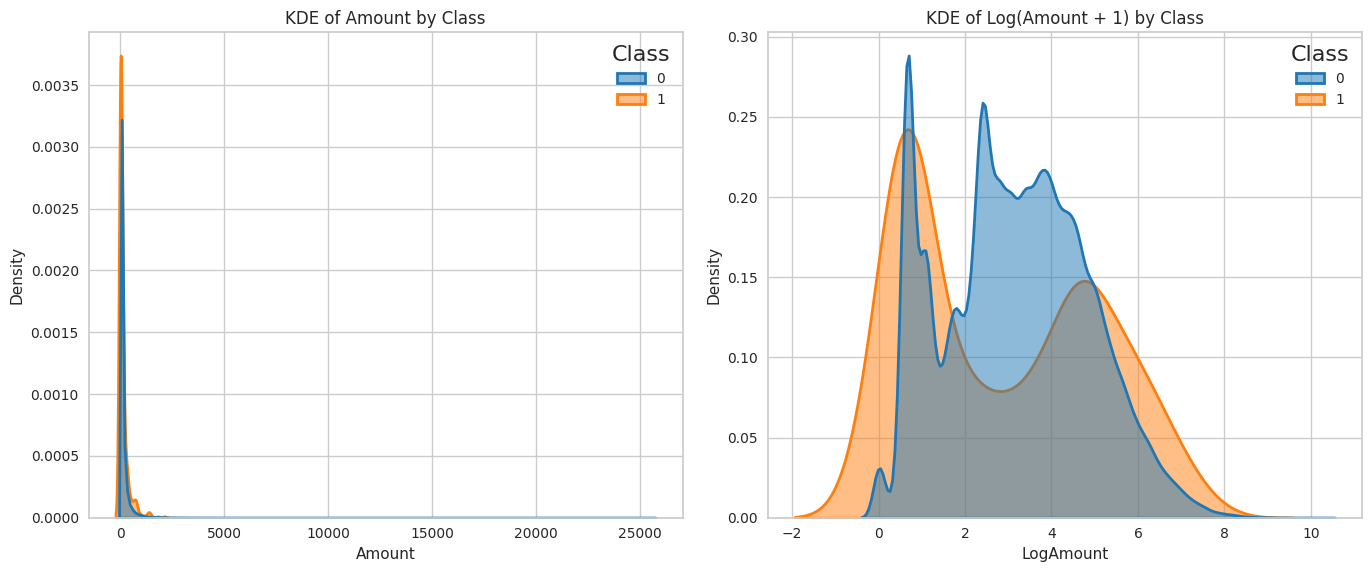

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(data=df,
            x="Amount",
            hue="Class",
            fill=True,
            common_norm=False,
            alpha=0.5,
            linewidth=2.0,
            ax=axes[0])
axes[0].set_title("KDE of Amount by Class")

sns.kdeplot(data=df,
            x="LogAmount",
            hue="Class",
            fill=True,
            common_norm=False,
            alpha=0.5,
            linewidth=2.0,
            ax=axes[1])
axes[1].set_title("KDE of Log(Amount + 1) by Class")

plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "amount_log_amount_kde.png", dpi=300)
plt.show()

The entire density is squeezed near zero due to extreme outliers (max ~25000) for class 0, similar for class 1.

Class 1 (fraud) has a sharp peak around log ≈ 0.7 → roughly 1.00 in raw terms.

Class 0 (legit) shows a broader, multimodal spread: peaks near log ≈ 1.5–2.0 and again ≈ 4.0–5.0.

Class 1 appears concentrated, Class 0 appears diverse.

##  PCA Feature Analysis (V1-V28)

### Summary statistics

In [21]:
df[[f"V{i}" for i in range(1, 29)]].describe().T

,count,mean,std,min,25%,50%,75%,max
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995
V10,283726.0,-0.001441,1.076407,-24.588262,-0.535578,-0.093237,0.453619,23.745136


### KDE plots of PCs stratified by class

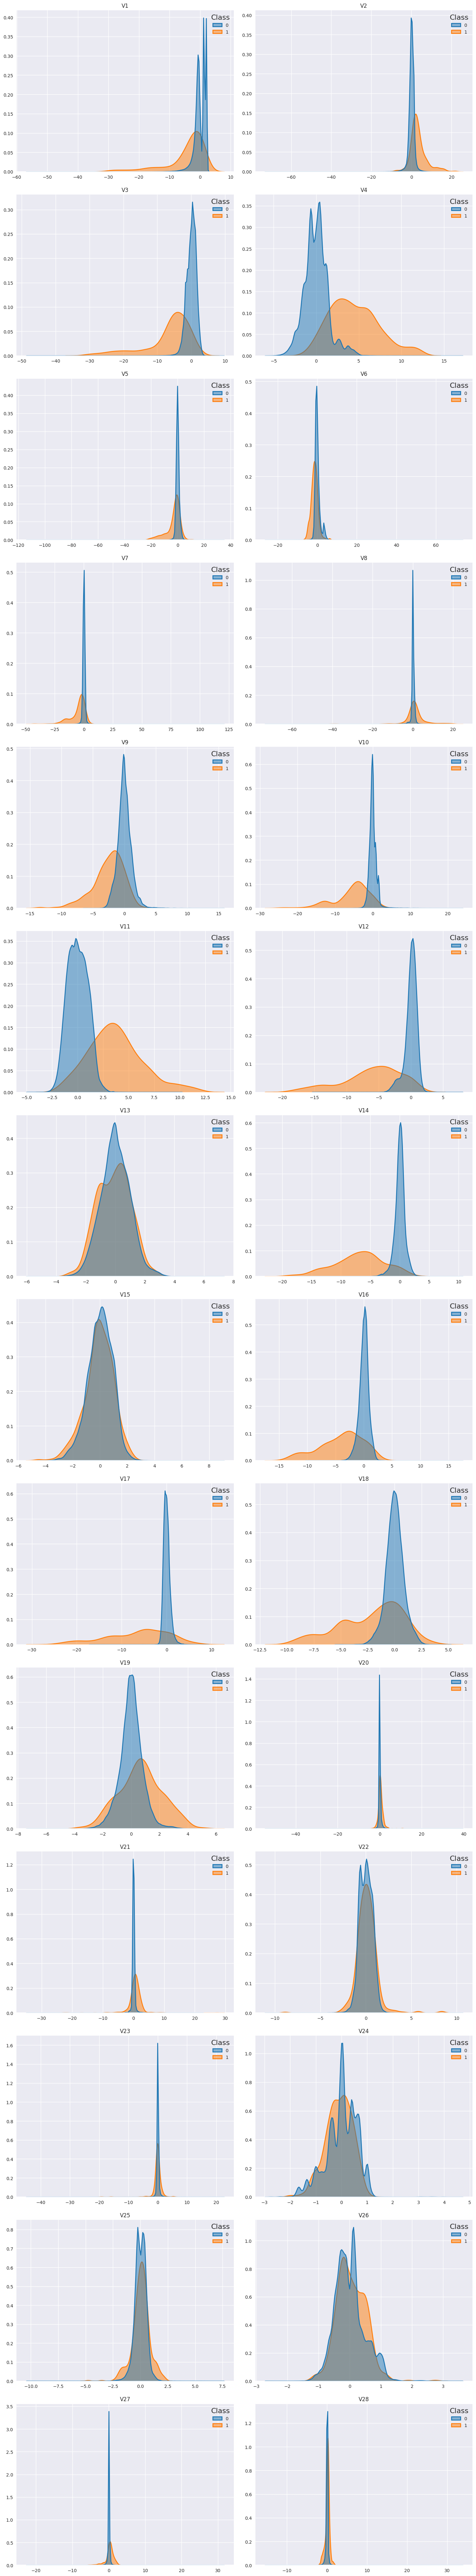

In [22]:
pc_features = [f"V{i}" for i in range(1, 29)]

fig, axes = plt.subplots(14, 2, figsize=(15, 80))
axes = axes.flatten()

for i, col in enumerate(pc_features):

    sns.kdeplot(data=df,
                x=col,
                hue="Class",
                fill=True,
                common_norm=False,
                alpha=0.5,
                linewidth=2.0,
                ax=axes[i])

    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(len(pc_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
#plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "pcs_kde.png", dpi=300)
plt.show()

Some insights that should be better investigated:
- V4, V10, V11, V12, V14, V17 are highly promising candidates for model discrimination and maybe feature selection.
- V2, V3, V5, V6, V8, V13, V16, V18, V22 may not separate well alone but could help in interaction with others.
- V1, V7, V9, V19, V20, V21, V23, V28, V15, V26 are probably noise or redundant for classification.

### Violin Plot Comparison

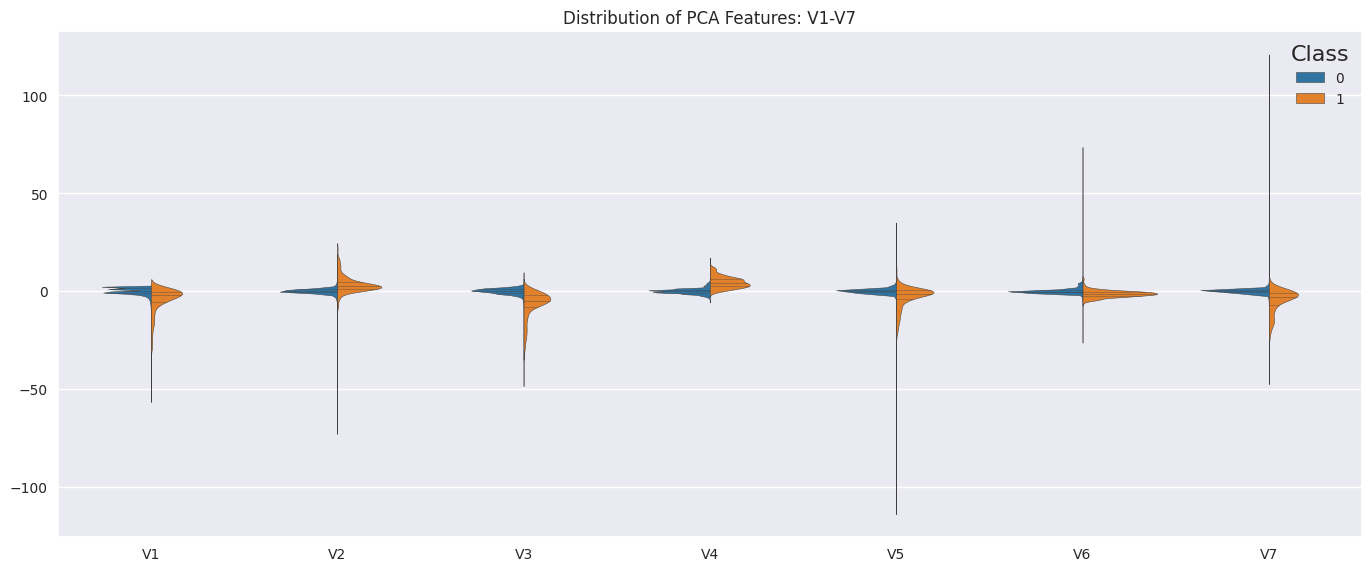

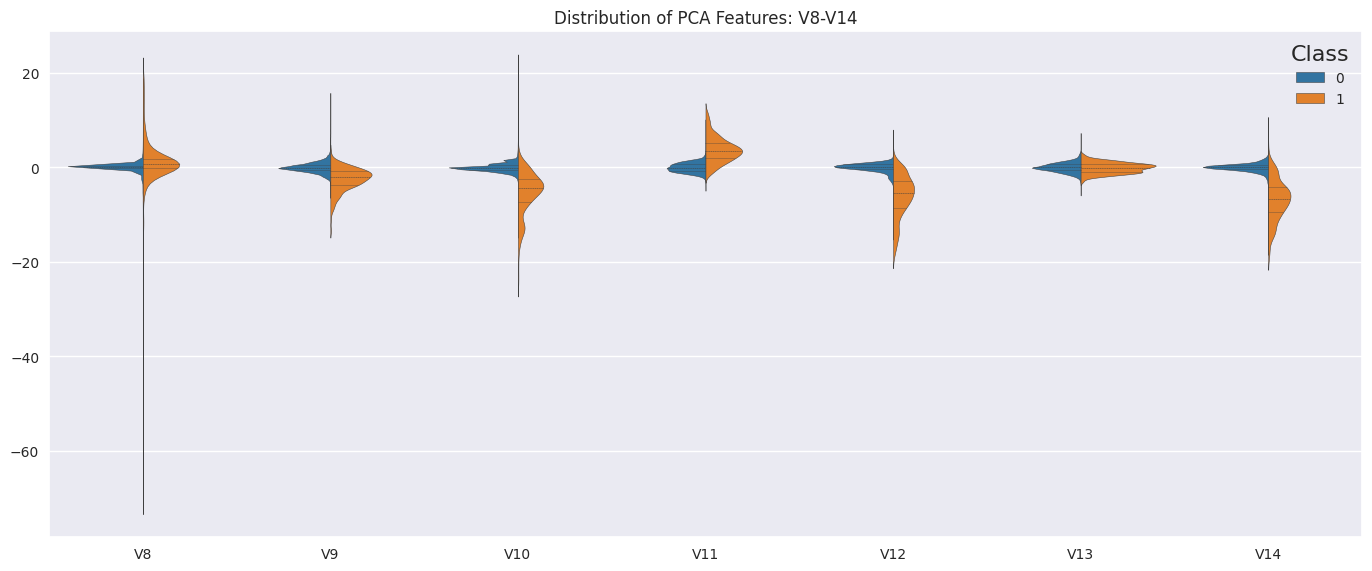

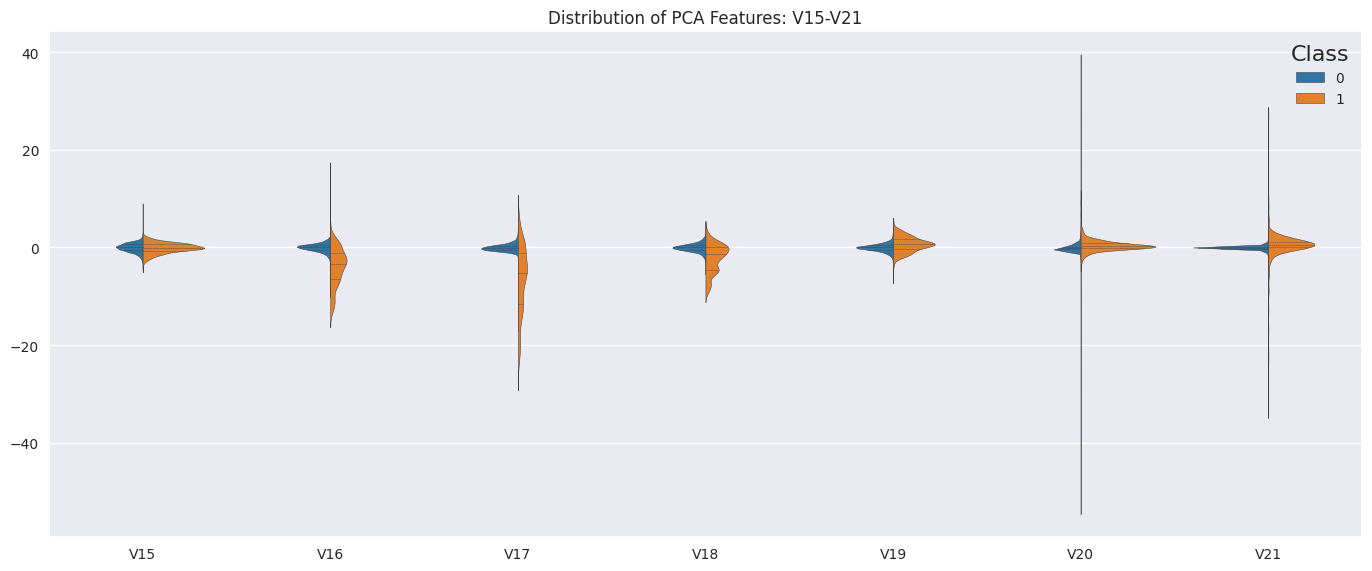

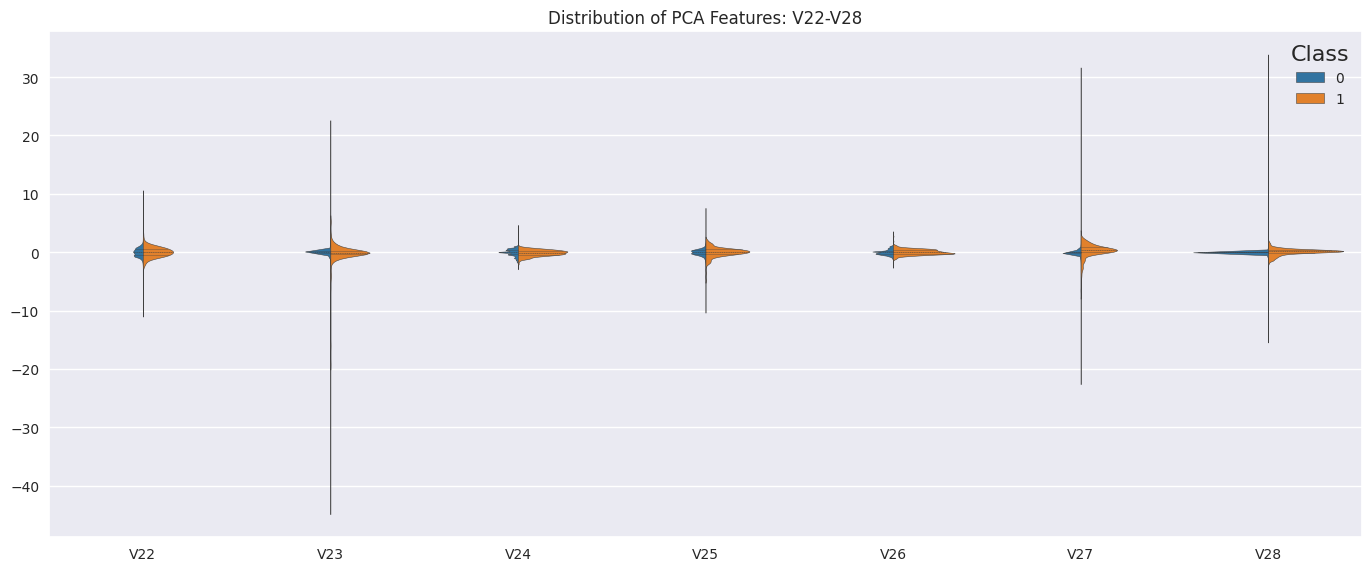

In [23]:
for i in range(4):
    plt.figure(figsize=(14, 6))
    start = i * 7 + 1
    end = min(start + 7, 29)  # Ensure we don't exceed V28
    selected_vars = [f"V{j}" for j in range(start, end)]

    melted = df.melt(id_vars="Class", value_vars=selected_vars)
    sns.violinplot(
        data=melted,
        x="variable",
        y="value",
        hue="Class",
        split=True,
        inner="quartile",
    )

    plt.xlabel("")
    plt.ylabel("")

    plt.title(f"Distribution of PCA Features: {selected_vars[0]}-{selected_vars[-1]}")
    plt.tight_layout()
    plt.savefig(FIGURES_DATA_EXPLORATION_DIR /
                f"pcs_violin_{selected_vars[0]}_{selected_vars[-1]}.png", dpi=300)
    plt.show()

## Overall Feature Structure and Redundancy

### Pearson Correlation Heatmap among Features

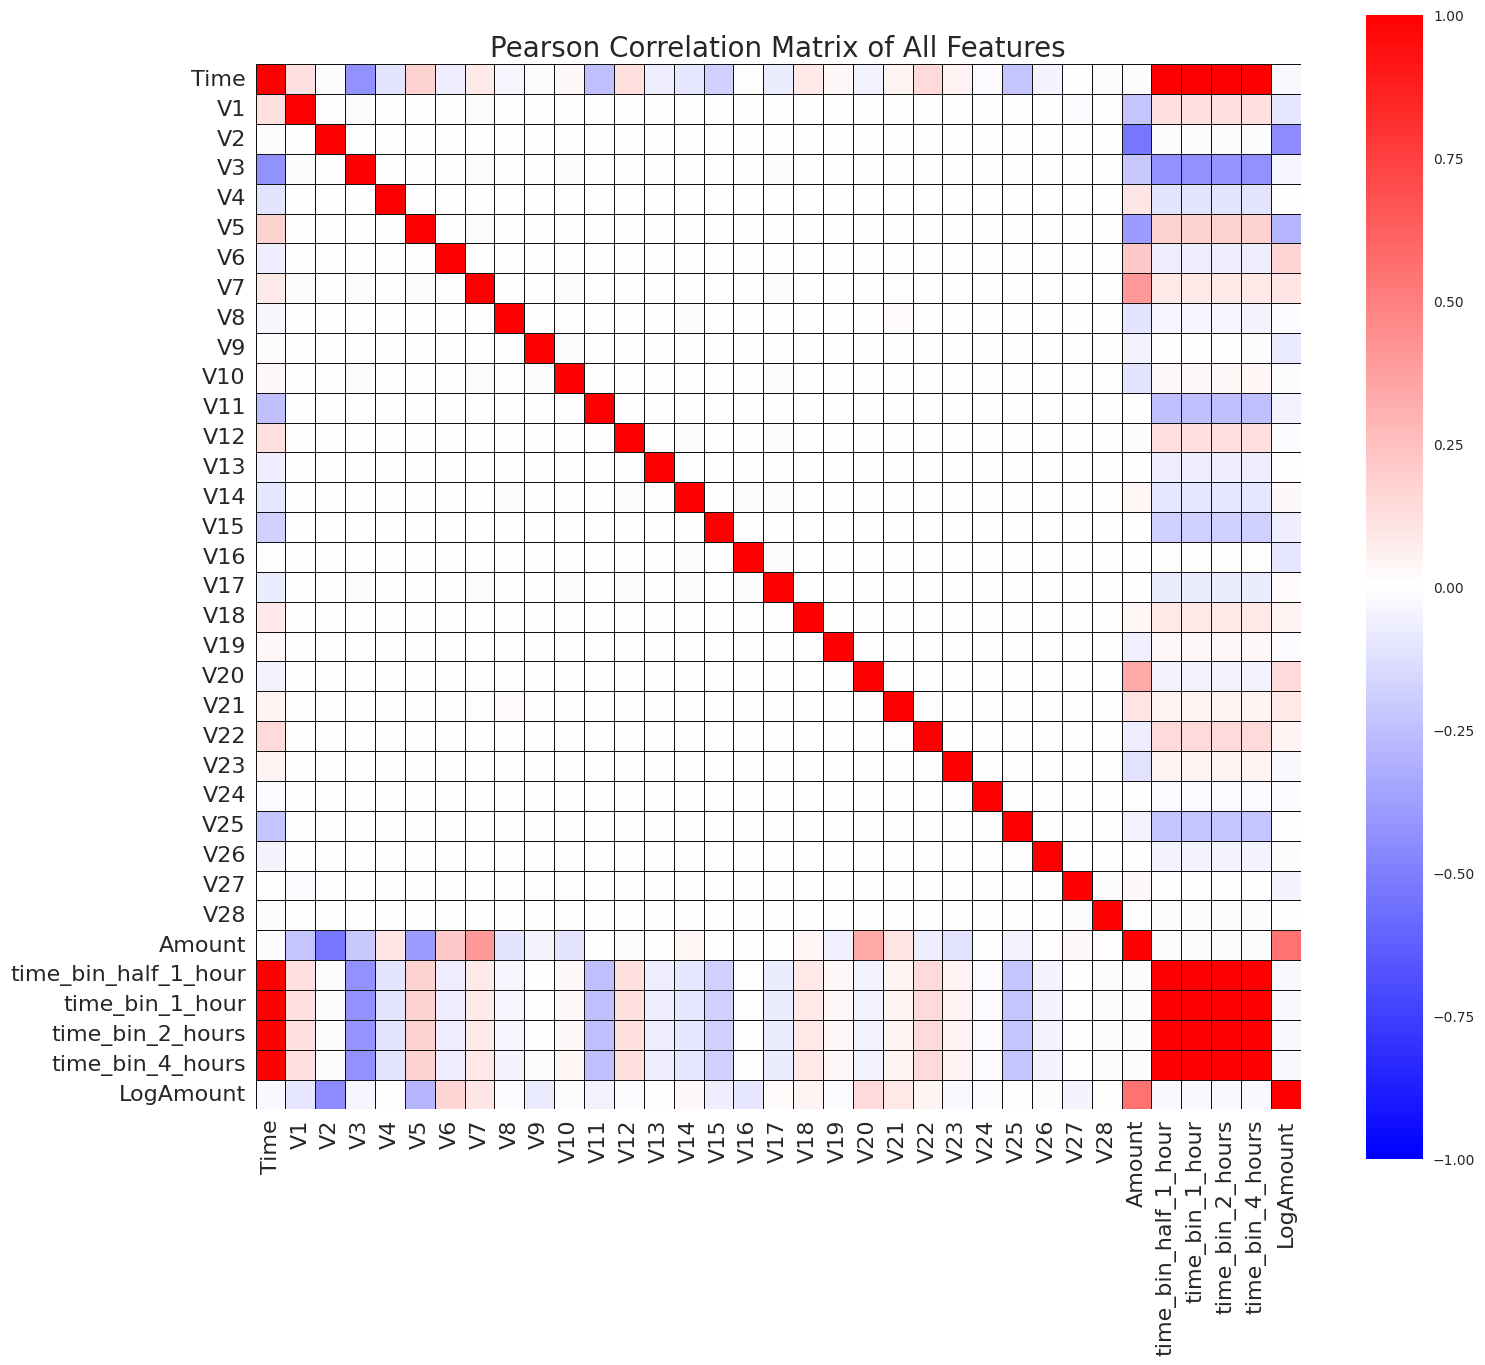

In [24]:
# Compute the correlation matrix (excluding the 'Class' column)
corr = df.loc[:, df.columns != 'Class'].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(
    corr,
    cmap="bwr",
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    annot=False,
    linecolor="k",
    linewidths=0.5,
)

plt.tick_params(labelsize=16)
plt.title("Pearson Correlation Matrix of All Features", fontsize=20)
plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "features_correlation_matrix.png", dpi=300)
plt.show()

The PCA components (V1–V28) are mostly uncorrelated, confirming that:
- PCA transformation was applied correctly
- Features are orthogonal (linearly independent) → No need to remove features due to collinearity

A few weak-to-moderate correlations are visible among:

- LogAmount and V12–V14

- Time and early PCA components (e.g., V1, V4)

Some small clusters may exist — but no obvious multicollinearity

### Shapiro Ranking (Normality Check per Feature)

/home/leonardosaccotelli/Desktop/UNIVERSITA/MACHINE-LEARNING/Dynamic-Ensemble-Learning-for-Credit-Card-Fraud-Detection/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 283726.
  res = hypotest_fun_out(*samples, **kwds)


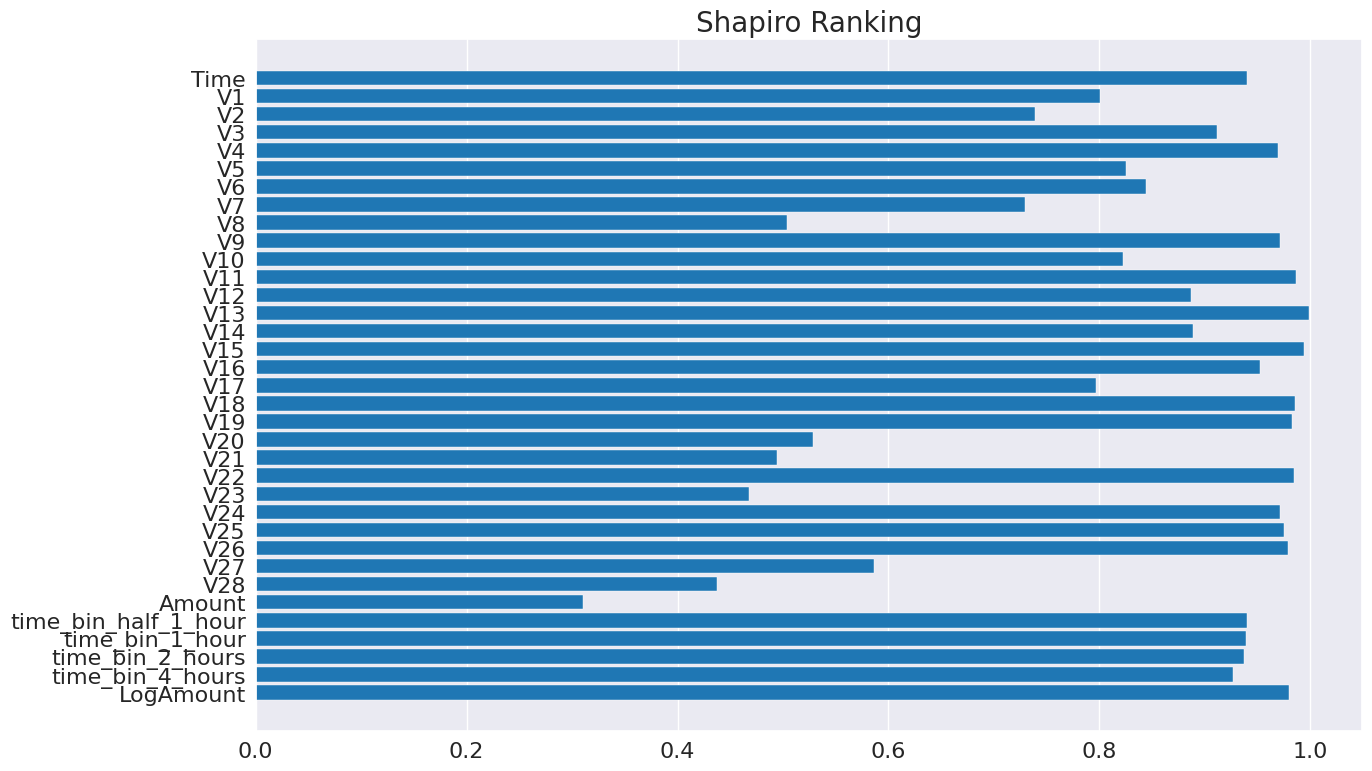

In [25]:
# Instantiate the 1D visualizer with the Shapiro ranking algorithm
X = df.loc[:, df.columns != 'Class']
y = df["Class"]
visualizer = Rank1D(algorithm='shapiro')

plt.figure(figsize=(14, 8))
visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data

plt.title("Shapiro Ranking", fontsize=20)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "shapiro_features_rank.png", dpi=300)
plt.show()

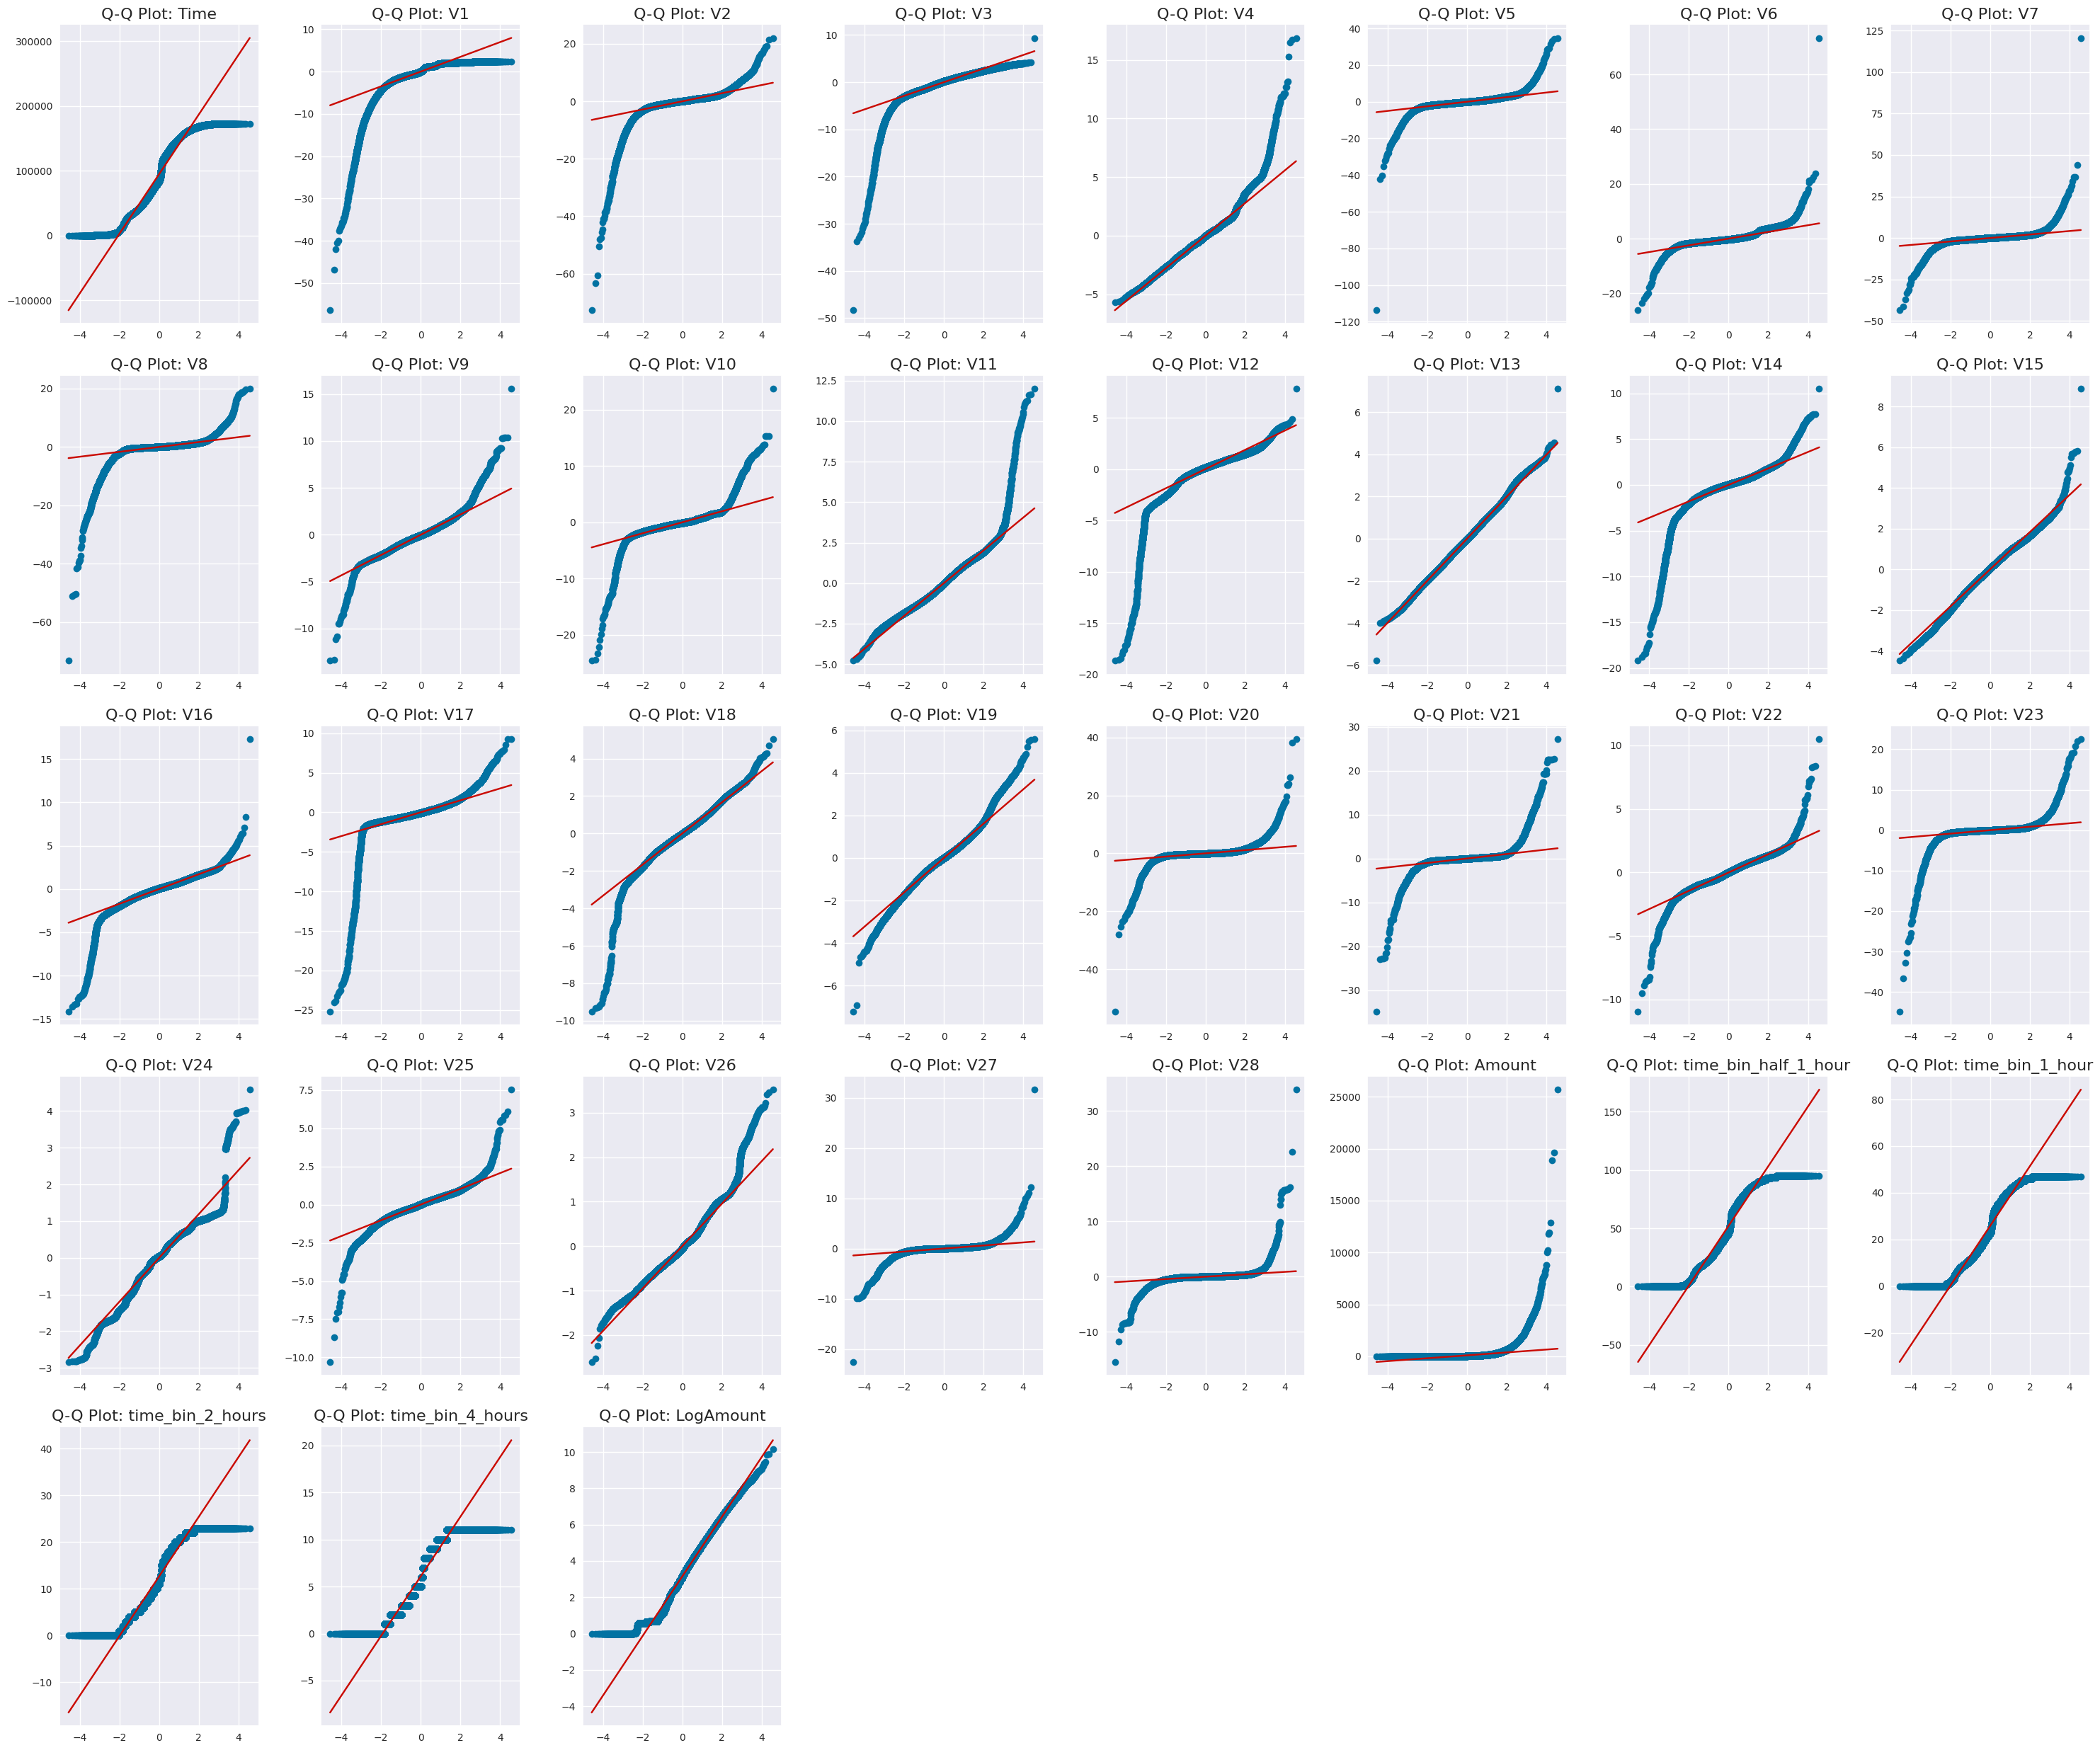

In [26]:
features = [col for col in df.columns if col != "Class"]

n_cols = 8
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    stats.probplot(df[feature], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {feature}", fontsize=16)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "qq_plot_features.png", dpi=300)
plt.show()

## Feature Relevance to Target class

### Feature Correlation with Target

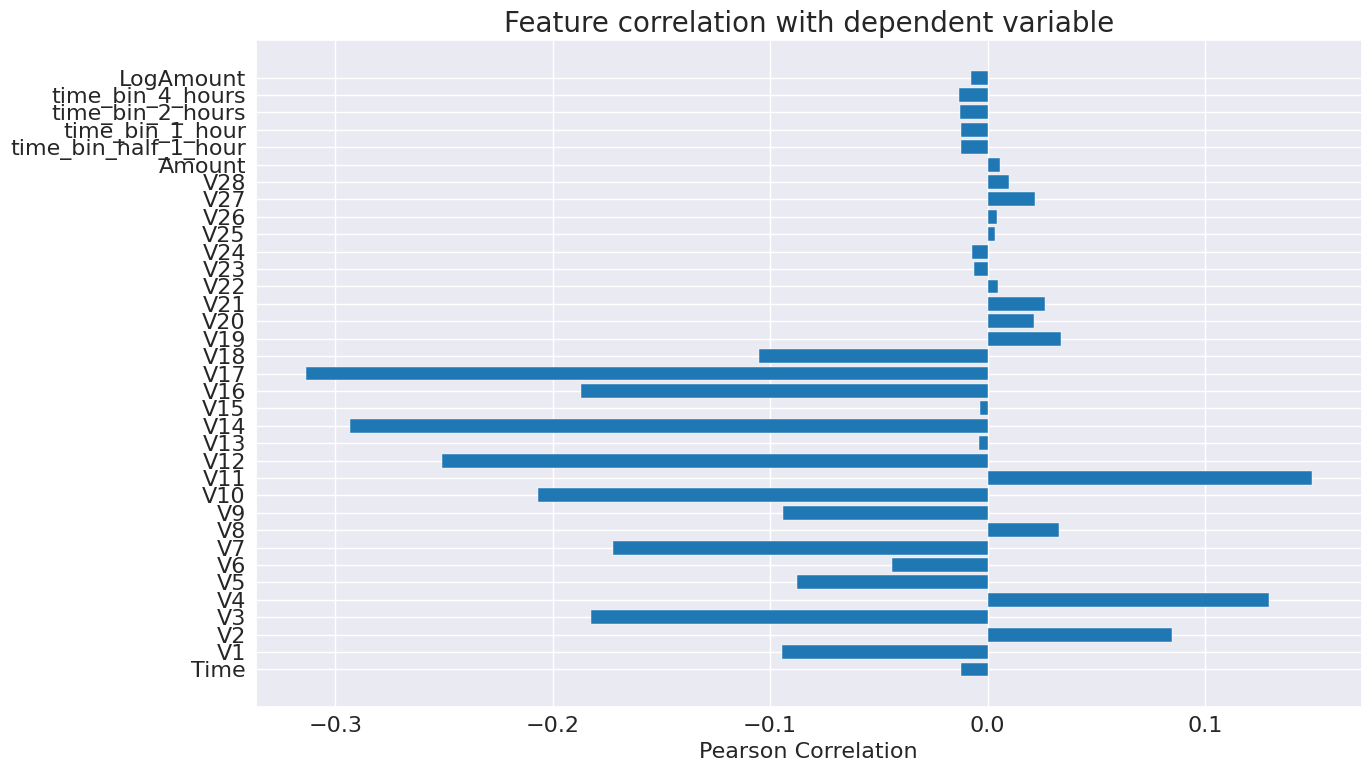

In [27]:
X = df.loc[:, df.columns != 'Class']
y = df["Class"]

plt.figure(figsize=(14, 8))
viz = FeatureCorrelation(labels=X.columns, method="pearson")
viz.fit(X, y)

plt.title("Feature correlation with dependent variable", fontsize=20)
plt.xlabel("Pearson Correlation", fontsize=16)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "correlation_features_target.png", dpi=300)
plt.show()

PCA features V11–V17 carry strong linear separability.
- V11, V12, V14, V17, V10	Strongest (negative) correlation with fraud class
- LogAmount, Hour, Time	Weak or no linear correlation
- Amount close to 0 correlation

### Mutual Information with Target

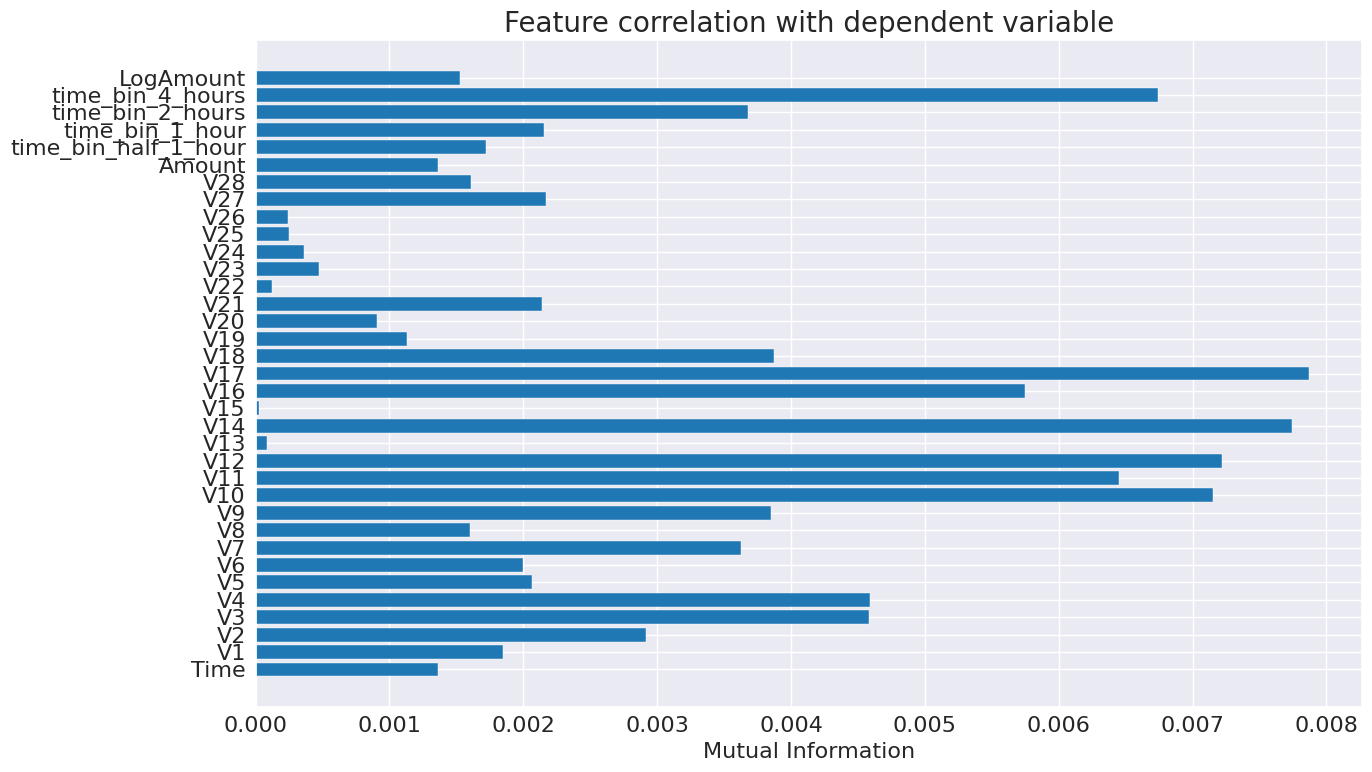

In [28]:
X = df.loc[:, df.columns != 'Class']
y = df["Class"]

plt.figure(figsize=(14, 8))
viz = FeatureCorrelation(labels=X.columns, method="mutual_info-classification")
viz.fit(X, y)

plt.title("Feature correlation with dependent variable", fontsize=20)
plt.xlabel("Mutual Information", fontsize=16)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig(FIGURES_DATA_EXPLORATION_DIR / "mutual_information_features_target.png", dpi=300)
plt.show()

No feature has extremely high MI (> 0.01), which is expected due to high class imbalance and feature obfuscation (PCA):
- V17, V14, V12, V11, V10, V27	Highest MI — top fraud indicators
- LogAmount, Hour — Moderate MI (more relevant than many PCA features)
- Amount (raw) — Less informative than LogAmount
- Many PCA features (e.g., V1, V4, V3, V8) — Carry small but non-zero signal